<a href="https://colab.research.google.com/github/SaraBCoutinho/Capacita-ao_Tecnologica/blob/main/Atividade_Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 Curso : Ciência de Dados




Alunas: Camila Perazzo e Sara Coutinho. 

Atividade de Analise Exploratoria - 17/04/2023. 

Para arquivo propostas de soluçoes (Diario de Bordo): 

* 6/4/23: 10:30 às 11:00 - Reuniao de Alinhamento

* 8/4/23: 8:30 às 9:30 -  Compreensao das atividades, entendimento do negocio, coleta dos dados 
* 10/4/23: 17:00 às 19 - Amostragem
* 15/4/23 : 13:30 às 14:30 - Correçao de arquivo e ajustes dos calculos preenchimento valores nulos
* 16/4/23: 18:00 às 20:00
* 17/4/23: 17:30 às 23:00


Com base no ciclo de vida do projeto de Data Science, seguiremos as seguintes etapas: 


*   Entendimento do Negócio
*   Coleta dos Dados
*   Preparação dos dados
*   Análise Exploratória



Conforme o exercício proposto, segue abaixo a lista descrevendo onde cada questão foi resolvida: 

1) Preparação dos dados - Está na etapa de preparação dos dados 

2) Amostragem - Está na etapa de Análise Exploratória 

3) Correlação das variáveis - Está na etapa de Análise Exploratória 

4) Estatística descritiva - Está na etapa de Análise Exploratória  

# 💰 Entendimento do negócio

Com isso, seguimos com as etapas de entendimento do negócio, coleta, preparação e análise. Para o entendimento do negócio, aplicamos o 5W2H: What, Who, Where, When, Why, How, How Much. 


* *What* - **Monitoramento de sinais vitais**. 


* *Where* - Não definido. 


* *When* - Deadline da atividade. 


* *Who* - Reportar para o professor da disciplina.


* *Why* - O monitoramento de sinais vitais é importante para a manutenção da saúde da população. 


* *How* - A partir de dados obtidos por sensores, a respeito dos sinais vitais, é possível detectar padrões de comportamentos normais dos pacientes a partir de data mining e fazer o monitoramento da saúde dos pacientes. 


* *How much* - Não definido, mas a parte de custo seria relativo ao custo para obtenção do arquivo com dados. 

Conforme passado na questão, as variáveis dos dados são as descritas abaixo e com os respectivos limites de variação: 

**0<= BATIMENTO CARDÍACO < 100**

**0<= PRESSÃO ARTERIAL < 20**

**0<= TEMPERATURA CORPORAL < 40**

# 🎲 Coleta dos dados

Como os dados trabalhados são de batimento cardíaco, pressão arterial e temperatura corporal, espera-se que eles sejam dados quantitativos contínuos para as 3 variáveis, pois dessa forma será possível fazer as previsões e classificar o paciente entre saudável ou não saudável. 

O arquivo que usamos foi com terminação 7. 

In [331]:
#imports
import pandas as pd #dataframe 
import numpy as np 

#Entendendo os dados do arquivo
file = pd.read_table('/content/sinaisvitais003 100dias DV2 RAxxx7.txt')
file.head(5)

,0,66.53589838486225,10.267949192431123,36.83260158204132
0,1,66.935822,10.467911,36.888632
1,2,67.428850,10.714425,36.629427
2,3,68.000000,11.000000,36.877926
3,4,68.631919,11.315960,36.892643
4,5,69.305407,11.652704,36.812839


In [332]:
file.describe()

,0,66.53589838486225,10.267949192431123,36.83260158204132
count,2399.000000,2399.000000,2399.000000,2399.000000
mean,11.504794,70.151969,12.196575,36.897376
std,6.921088,2.829622,1.307599,0.261055
min,0.000000,62.677785,8.539146,36.456422
25%,6.000000,68.302421,11.287314,36.750119
50%,12.000000,70.619500,12.455299,36.894853
75%,17.500000,72.253916,13.240875,37.011356
max,23.000000,102.260510,22.874284,41.915304


Compreende-se que a primeira coluna corresponde ao batimento cardíaco, a segunda a pressão arterial e a terceira a temperatura corporal pela descrição dos valores. Os dados serão ajustados para nomear as colunas de acordo com as variáveis as quais eles correspondem.

In [333]:
#CSV para dataframe
data = pd.read_csv('/content/sinaisvitais003 100dias DV2 RAxxx7.txt', sep='\t',names=['Batimento','Pressao','Temperatura'])

#data=list(d)
#visualizando os dados
data

,Batimento,Pressao,Temperatura
0,66.535898,10.267949,36.832602
1,66.935822,10.467911,36.888632
2,67.428850,10.714425,36.629427
3,68.000000,11.000000,36.877926
4,68.631919,11.315960,36.892643
...,...,...,...
19,69.669352,12.314528,41.011285
20,68.288729,12.505198,37.117865
21,67.653875,12.402058,37.073562
22,67.435384,12.207166,36.627888


Os dados sao quantitativos continuos.

# 🎲  Preparação dos Dados 

## 1) Preparação dos Dados 


* 1.1 ) Detecção dos valores fora das faixas normais
* 1.2 ) substituição caso não sejam 

In [334]:
#verificaçao dos tipos de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 23
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Batimento    2400 non-null   float64
 1   Pressao      2400 non-null   float64
 2   Temperatura  2400 non-null   float64
dtypes: float64(3)
memory usage: 75.0 KB


Os valores já estão em formato float que comporta números reais. Será verificada a existência de valores fora dos limites para serem tratados na etapa de preparação. 

In [335]:
#verificaçao da existência de valores nulos
data.isnull().sum()

Batimento      0
Pressao        0
Temperatura    0
dtype: int64

In [336]:
#verificaçao da existência de valores duplicados
data.duplicated().sum()

0

Como nao existêm valores nulos nem duplicados, sera feito o ajuste sobre os valores fora dos limites conforme proposto no exercicio. 

In [337]:
count_batimento = 0
lista_batimento = []
count_pressao = 0
lista_pressao = []
count_temperatura = 0
lista_temperatura = []
for column in data.columns:
  if column == 'Batimento':
    for element in data['Batimento']:
      if (element < 0) or (element > 99):
        count_batimento +=1
        lista_batimento.append(element)
  elif column == 'Pressao':
    for  element in data['Pressao']:
      if (element < 0) or (element > 19):
        count_pressao +=1
        lista_pressao.append(element)
  elif column == 'Temperatura':
    for element in data['Temperatura']:
      if (element < 0) or (element > 39):
        count_temperatura +=1 
        lista_temperatura.append(element)   

In [338]:
print('O total de valores fora dos limites superior e inferior para o batimento sao: ',
      count_batimento,' para a pressao: ',count_pressao,' e para a temperatura: ',count_temperatura,'.')

O total de valores fora dos limites superior e inferior para o batimento sao:  3  para a pressao:  3  e para a temperatura:  3 .


In [339]:
print('Os valores fora dos limites sao: para o batimento',lista_batimento,'para a pressao: ',lista_pressao,' e para a temperatura: ',lista_temperatura,'.')

Os valores fora dos limites sao: para o batimento [102.04258102773412, 102.26050962071476, 101.84662280012496] para a pressao:  [21.460717379976344, 22.874284301610945, 21.937331982410303]  e para a temperatura:  [41.91530397736243, 41.727868474442296, 41.01128458809205] .


In [340]:
#imputando a média

#novo dataframe para imputar valores
data_tratamento = data.copy()
data_tratamento['Hora']=data.index
data_tratamento = data_tratamento.reset_index()

#verificando index dos dados que estao fora do limite 
#batimento : [102.04258102773412, 102.26050962071476, 101.84662280012496]
print('Batimento')
print(data_tratamento[data_tratamento['Batimento']==102.04258102773412].index)
print(data_tratamento[data_tratamento['Batimento']==102.26050962071476].index)
print(data_tratamento[data_tratamento['Batimento']==101.84662280012496].index)
#pressao : [21.460717379976344, 22.874284301610945, 21.937331982410303
print('Pressao')
print(data_tratamento[data_tratamento['Pressao']==21.460717379976344].index)
print(data_tratamento[data_tratamento['Pressao']==22.874284301610945].index)
print(data_tratamento[data_tratamento['Pressao']==21.937331982410303].index)
#temperatura : [41.91530397736243, 41.727868474442296, 41.01128458809205] 
print('Temperatura')
print(data_tratamento[data_tratamento['Temperatura']==41.91530397736243].index)
print(data_tratamento[data_tratamento['Temperatura']==41.727868474442296].index)
print(data_tratamento[data_tratamento['Temperatura']==41.01128458809205].index)

Batimento
Int64Index([479], dtype='int64')
Int64Index([1022], dtype='int64')
Int64Index([2388], dtype='int64')
Pressao
Int64Index([491], dtype='int64')
Int64Index([1028], dtype='int64')
Int64Index([2388], dtype='int64')
Temperatura
Int64Index([515], dtype='int64')
Int64Index([1032], dtype='int64')
Int64Index([2395], dtype='int64')


In [341]:
%%capture
#imputando valores nulos para bfill 
data_tratamento_bfill = data_tratamento.copy()

#imputando valores nulos para ffill 
data_tratamento_ffill = data_tratamento.copy()

#inputando valores nulos nos campos em que eles estao fora dos limites considerados 
data_tratamento_bfill['Batimento'].loc[479], data_tratamento_bfill['Batimento'].loc[1022], data_tratamento_bfill['Batimento'].loc[2388] = None, None, None
data_tratamento_bfill['Pressao'].loc[491], data_tratamento_bfill['Pressao'].loc[1028], data_tratamento_bfill['Pressao'].loc[2388] = None, None, None
data_tratamento_bfill['Temperatura'].loc[515], data_tratamento_bfill['Temperatura'].loc[1032], data_tratamento_bfill['Temperatura'].loc[2395] = None, None, None

data_tratamento_ffill['Batimento'].loc[479], data_tratamento_ffill['Batimento'].loc[1022], data_tratamento_ffill['Batimento'].loc[2388] = None, None, None
data_tratamento_ffill['Pressao'].loc[491], data_tratamento_ffill['Pressao'].loc[1028], data_tratamento_ffill['Pressao'].loc[2388] = None, None, None
data_tratamento_ffill['Temperatura'].loc[515], data_tratamento_ffill['Temperatura'].loc[1032], data_tratamento_ffill['Temperatura'].loc[2395] = None, None, None

#preenchendo com bfill
data_tratamento_bfill=data_tratamento_bfill.fillna(method='bfill')
#preenchendo com ffill
data_tratamento_ffill=data_tratamento_ffill.fillna(method='ffill')



In [342]:
#verificando valores preenchidos a partir dos dados anteriores 
print(data_tratamento_bfill['Batimento'].loc[479],data_tratamento_bfill['Batimento'].loc[1022],data_tratamento_bfill['Batimento'].loc[2388])
print(data_tratamento_bfill['Pressao'].loc[491],data_tratamento_bfill['Pressao'].loc[1028],data_tratamento_bfill['Pressao'].loc[2388])
print(data_tratamento_bfill['Temperatura'].loc[515],data_tratamento_bfill['Temperatura'].loc[1032],data_tratamento_bfill['Temperatura'].loc[2395])

#verificando valores preenchidos a partir dos dados posteriores
print(data_tratamento_ffill['Batimento'].loc[479],data_tratamento_ffill['Batimento'].loc[1022],data_tratamento_ffill['Batimento'].loc[2388])
print(data_tratamento_ffill['Pressao'].loc[491],data_tratamento_ffill['Pressao'].loc[1028],data_tratamento_ffill['Pressao'].loc[2388])
print(data_tratamento_ffill['Temperatura'].loc[515],data_tratamento_ffill['Temperatura'].loc[1032],data_tratamento_ffill['Temperatura'].loc[2395])



65.83949936926456 73.23914035693186 69.2668742131401
13.64436758778996 12.887783385414023 13.175725485356317
37.02389585493685 36.7594016329112 37.11786513281035
70.51424189025641 72.28910224751941 68.38246614554963
13.03212277006944 12.847844308182204 12.864476463680672
36.97653996339061 36.50396737117941 37.05925529482506


In [343]:
#calculando a média dos valores para preencher para batimento 
print(((65.83949936926456+70.51424189025641)/2),((73.23914035693186+72.28910224751941)/2),((69.2668742131401+68.38246614554963)/2))

#calculando a média dos valores para preencher para pressao 
print(((13.64436758778996+13.03212277006944)/2),((12.8877833854140236+12.847844308182204)/2),((13.175725485356317+12.864476463680672)/2))

#calculando a média dos valores para preencher para temperatura 
print(((37.02389585493685+36.97653996339061)/2),((36.7594016329112+36.50396737117941)/2),((37.11786513281035+37.05925529482506)/2))


68.17687062976049 72.76412130222563 68.82467017934486
13.3382451789297 12.867813846798114 13.020100974518495
37.00021790916373 36.6316845020453 37.0885602138177


In [344]:
%%capture
#inputando os valores no conjunto de dados tratamento 
data_tratamento['Batimento'].loc[479], data_tratamento['Batimento'].loc[1022], data_tratamento['Batimento'].loc[2388] = None, None, None
data_tratamento['Pressao'].loc[491], data_tratamento['Pressao'].loc[1028], data_tratamento['Pressao'].loc[2388] = None, None, None
data_tratamento['Temperatura'].loc[515], data_tratamento['Temperatura'].loc[1032], data_tratamento['Temperatura'].loc[2395] = None, None, None

In [345]:
#verificando os valores nulos nas colunas do dataframe de tratamento 
data_tratamento.isnull().sum()

index          0
Batimento      3
Pressao        3
Temperatura    3
Hora           0
dtype: int64

In [346]:
%%capture
#inputando os valores de média do valor anterior com o posterior no conjunto de dados tratamento 
data_tratamento['Batimento'].loc[479], data_tratamento['Batimento'].loc[1022], data_tratamento['Batimento'].loc[2388] = 68.17687062976049, 72.76412130222563, 68.82467017934486
data_tratamento['Pressao'].loc[491], data_tratamento['Pressao'].loc[1028], data_tratamento['Pressao'].loc[2388] = 13.3382451789297, 12.867813846798114, 13.020100974518495
data_tratamento['Temperatura'].loc[515], data_tratamento['Temperatura'].loc[1032], data_tratamento['Temperatura'].loc[2395] = 37.00021790916373, 36.6316845020453, 37.0885602138177

In [347]:
#verificando se os valores foram imputados corretamente no dataframe criado pra tratamento
data_tratamento.isnull().sum()

index          0
Batimento      0
Pressao        0
Temperatura    0
Hora           0
dtype: int64

In [348]:
#substituindo os dados do dataframe data pelos dados do dataframe tratado
data = data_tratamento

In [349]:
#verificando novamente a  existência de valores dentro dos limites 

count_batimento = 0
lista_batimento = []
count_pressao = 0
lista_pressao = []
count_temperatura = 0
lista_temperatura = []
for column in data.columns:
  if column == 'Batimento':
    for element in data['Batimento']:
      if (element < 0) or (element > 99):
        count_batimento +=1
        lista_batimento.append(element)
  elif column == 'Pressao':
    for  element in data['Pressao']:
      if (element < 0) or (element > 19):
        count_pressao +=1
        lista_pressao.append(element)
  elif column == 'Temperatura':
    for element in data['Temperatura']:
      if (element < 0) or (element > 39):
        count_temperatura +=1 
        lista_temperatura.append(element)  

print('O total de valores fora dos limites superior e inferior para o batimento sao: ',
      count_batimento,' para a pressao: ',count_pressao,' e para a temperatura: ',count_temperatura,'.')

O total de valores fora dos limites superior e inferior para o batimento sao:  0  para a pressao:  0  e para a temperatura:  0 .


Todos os valores estao dentro dos limites. 

In [350]:
#verificando se os valores foram imputados corretamente no dataframe criado pra tratamento
data.isnull().sum()

index          0
Batimento      0
Pressao        0
Temperatura    0
Hora           0
dtype: int64

Nao existem valores nulos. 

In [351]:
data_tratamento.duplicated().sum()

0

Existem 3 dados com medições de batimento fora dos limites, 3 de pressão e 3 de temperatura. Esses valores serão retirados. 

In [352]:
#verificando o shape final do conjunto de dados 
data.shape

(2400, 5)

In [353]:
data = data.set_index('index')
data = data.drop(columns=['Hora'])
data.shape

(2400, 3)

# 🎲 Análise Exploratória dos Dados

## 2 ) Divisao do arquivo em amostras e Correlaçao das Variaveis. 

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tamanho_pacote = 24  # Tamanho desejado para cada pacote
pacotes = []  # Lista para armazenar os pacotes

# Selecionar apenas as colunas desejadas
dados_selecionados = data[['Batimento', 'Pressao', 'Temperatura']]

# Dividir os dados em pacotes de tamanho 'tamanho_pacote'
for i in range(0, len(dados_selecionados), tamanho_pacote):
    pacote = dados_selecionados.iloc[i:i+tamanho_pacote].reset_index(drop=True)
    pacotes.append(pacote)

pacotes

[    Batimento    Pressao  Temperatura
 0   66.535898  10.267949    36.832602
 1   66.935822  10.467911    36.888632
 2   67.428850  10.714425    36.629427
 3   68.000000  11.000000    36.877926
 4   68.631919  11.315960    36.892643
 5   69.305407  11.652704    36.812839
 6   70.000000  12.000000    36.666667
 7   70.694593  12.347296    36.723124
 8   71.368081  12.684040    36.774994
 9   72.000000  13.000000    36.820647
 10  72.571150  13.285575    36.858600
 11  73.064178  13.532089    36.887574
 12  73.464102  13.732051    36.906526
 13  73.758770  13.879385    36.914691
 14  73.939231  13.969616    36.911603
 15  74.000000  14.000000    36.897114
 16  73.939231  13.969616    36.871406
 17  73.758770  13.879385    36.834985
 18  73.464102  13.732051    36.788675
 19  73.064178  13.532089    36.733594
 20  72.571150  13.285575    36.671126
 21  72.000000  13.000000    36.602886
 22  71.368081  12.684040    36.530673
 23  70.694593  12.347296    36.456422,
     Batimento    Pressa

No final ficaram 2400 instâncias e 3 colunas.

Visualização da evoluçao das correlaçoes entre as variáveis ao decorrer dos dias. 

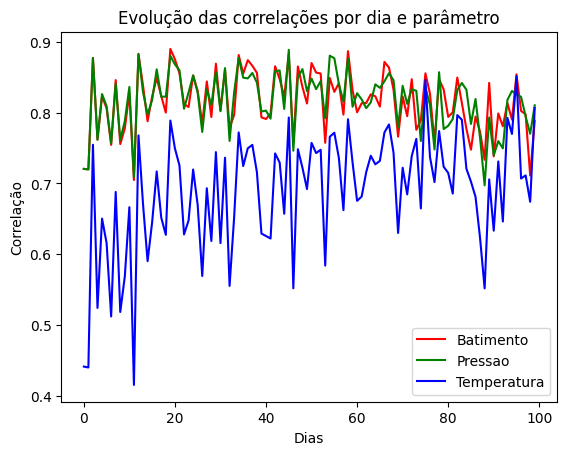

In [359]:
# Calcula a matriz de correlação da variavel pelo dia(pacote)
matrizes_corr = []
for pacote in pacotes:
    matriz_corr = pacote.corr()
    matrizes_corr.append(matriz_corr)

# Plota um gráfico de linhas com a evolução das correlações de cada parâmetro
parametros = ['Batimento', 'Pressao', 'Temperatura']
cores = ['r', 'g', 'b', 'y']
for i, parametro in enumerate(parametros):
    plt.plot(range(len(pacotes)), [matriz_corr.loc[parametro].mean() for matriz_corr in matrizes_corr], color=cores[i], label=parametro)
plt.xlabel('Dias')
plt.ylabel('Correlação')
plt.title('Evolução das correlações por dia e parâmetro')
plt.legend()
plt.show()

Por esse grafico concluimos que os valores do batimento e pressao estao mais proximos entre si e crescem e decrescem semelhantemente no decorrer dos dias. Além disso, é observado um decrescimento dos valores de correlaçoes de Batimento e pressao quando os dias se aproximam de 100. 
Ja a correlaçao da temperatura possui valores mais distantes das demais correlaçoes obtidas e ao invés de decrescer proximo aos 100 dias, a correlaçao cresce. Isso indica que as mediçoes de temperatura cresceram no decorrer do tempo. Ja as de batimento e pressao nao. 

Analisando o comportamento das variaveis por Hora, construimos a matriz de correlaçao de cada variavel entre si dentro dos grupos de amostras de tamanho 100 por cada Hora. 

In [387]:
#Analisando a correlaçao por grupos de amostras por hora ao invés de dia 
data['index'] = data.index
df = data.groupby(by=data['index'])

In [401]:
df.corr()

Batimento   Pressao  Temperatura
index                                              
0     Batimento     1.000000  0.310437    -0.198591
      Pressao       0.310437  1.000000     0.142538
      Temperatura  -0.198591  0.142538     1.000000
1     Batimento     1.000000  0.439939    -0.099109
      Pressao       0.439939  1.000000    -0.096177
...                      ...       ...          ...
22    Pressao       0.479318  1.000000    -0.493158
      Temperatura  -0.448135 -0.493158     1.000000
23    Batimento     1.000000  0.526581    -0.475231
      Pressao       0.526581  1.000000    -0.589307
      Temperatura  -0.475231 -0.589307     1.000000

[72 rows x 3 columns]

In [397]:
#Analisando a média de cada variavel por Hora
df.mean()

,Batimento,Pressao,Temperatura
index,,,
0,65.288922,9.781677,36.761740
1,65.694433,9.948717,36.766842
2,66.283532,10.244349,36.749426
3,66.847585,10.464401,36.748622
4,67.405521,10.839047,36.767889
5,67.966338,11.178180,36.739366
6,68.818664,11.521962,36.840623
7,69.448373,11.853379,36.883326
8,70.235211,12.184582,36.952611


In [404]:
#Analisando a média de cada variavel por Hora
df.mean().corr()

,Batimento,Pressao,Temperatura
Batimento,1.000000,0.998298,0.767599
Pressao,0.998298,1.000000,0.762375
Temperatura,0.767599,0.762375,1.000000


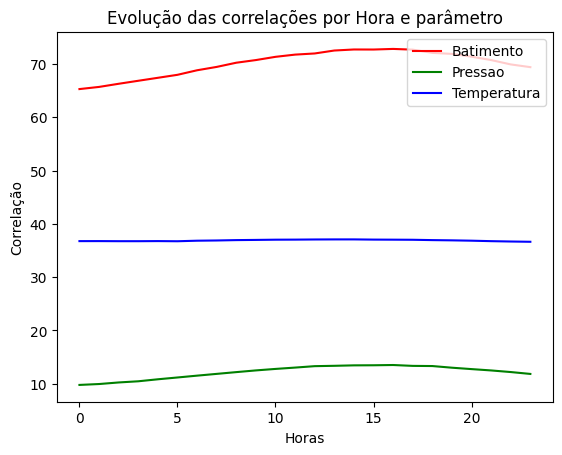

In [447]:
# Plota um gráfico de linhas com a evolução das correlações de cada parâmetro
parametros = ['Batimento', 'Pressao', 'Temperatura']
cores = ['r', 'g', 'b', 'y']
for i, parametro in enumerate(parametros):
    plt.plot(df.mean().index, df.mean()[parametro], color=cores[i], label=parametro)
plt.xlabel('Horas')
plt.ylabel('Correlação')
plt.title('Evolução das correlações por Hora e parâmetro')
plt.legend()
plt.show()

Por esse grafico vemos que a correlaçao do valor médio das variaveis Batimento e Pressao apresentam também um comportamento semelhante por Hora. Em contrapartida, o valor médio da Temperatura apresenta um comportamento constante por Hora. 

Comparando o comportamento das variaveis considerando as amostras por dia e as amostras por hora, concluiu-se que em ambos os casos tanto o Batimento quanto a Pressao possuiram comportamentos semelhantes. Em compensaçao, a Temperatura decresceu ao longo dos dias. Contudo, a temperatura se mostrou constante ao longo das horas. 

Em termos praticos, é interessante que o paciente averigue sua temperatura dia apos dia ja que esse é um fator que varia por dia, mas nao importa a hora do dia em que ela for medida. Além disso, a hora do dia que o batimento e a pressao apresentam um aumento sao em torno das 15 às 20 horas do dia. Por isso, é importante ter em mente essa possivel variaçao existente ao longo do dia também no processo de mediçao dessas variaveis no paciente. 

Para analisar os dados no geral, plotou-se uma matriz sem considerar o processo de amostragem. Foi utilizada a correlaçao de sperman a fim de que nao se assumisse um comportamento linear apriori das variaveis. 

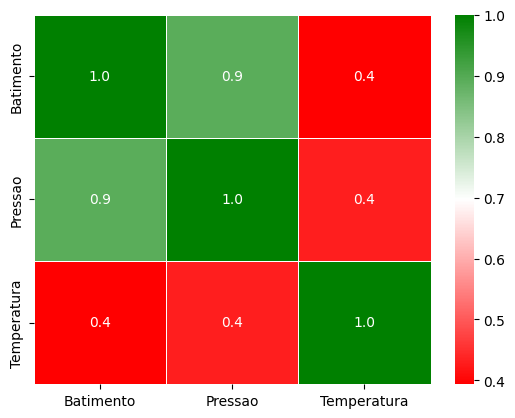

In [591]:
# plot da matriz de correlação
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
#cmap = sb.cm.rocket_r
plot = sb.heatmap(data[['Batimento', 'Pressao', 'Temperatura']].corr('spearman'), annot = True, fmt=".1f", linewidths=.6, cmap=cmap)


Nessa matriz também percebe-se que as variaveis Pressao e Batimento sao fortemente correlacionadas enquanto que com a Temperatura a correlaçao delas é mais fraca.

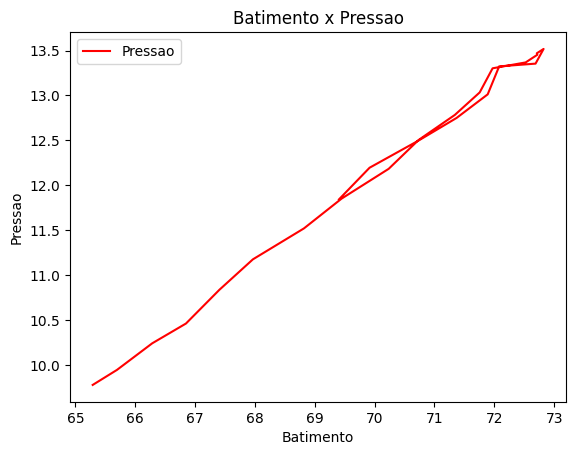

In [451]:
# Plota um gráfico de linhas cdo comportamento entre Batimento e Pressao
cor = ['r']
plt.plot(df.mean()['Batimento'], df.mean()['Pressao'], color=cores[i], label='Pressao')
plt.xlabel('Batimento')
plt.ylabel('Pressao')
plt.title('Batimento x Pressao')
plt.legend()
plt.show()

In [449]:
df.mean()['Batimento'].corr(df.mean()['Pressao'])

0.9982981431689093

De fato, as variaveis apresentam um comportamento praticamente linear e com tendência crescente confirmando a correlaçao forte e positiva das variaveis. 

## 3 ) Composiçao de Correlaçoes 

Conforme visto na questao 2, as correlaçoes mais fortes sao Batimento e Pressao. Considerou-se verificar o novo padrao de aprendizado a partir da correlaçao dessas duas variaveis.

In [441]:
df[['Batimento','Pressao']].corr()

Batimento   Pressao
index                               
0     Batimento   1.000000  0.310437
      Pressao     0.310437  1.000000
1     Batimento   1.000000  0.439939
      Pressao     0.439939  1.000000
2     Batimento   1.000000  0.266013
      Pressao     0.266013  1.000000
3     Batimento   1.000000  0.494477
      Pressao     0.494477  1.000000
4     Batimento   1.000000  0.422689
      Pressao     0.422689  1.000000
5     Batimento   1.000000  0.421179
      Pressao     0.421179  1.000000
6     Batimento   1.000000  0.259059
      Pressao     0.259059  1.000000
7     Batimento   1.000000  0.457953
      Pressao     0.457953  1.000000
8     Batimento   1.000000  0.380042
      Pressao     0.380042  1.000000
9     Batimento   1.000000  0.571576
      Pressao     0.571576  1.000000
10    Batimento   1.000000  0.382157
      Pressao     0.382157  1.000000
11    Batimento   1.000000  0.390961
      Pressao     0.390961  1.000000
12    Batimento   1.000000  0.347614
      Pressao     0.347614  1.000000
13    Batimento   1.000000  0.395263
      Pressao     0.395263  1.000000
14    Batimento   1.000000  0.529469
      Pressao     0.529469  1.000000
15    Batimento   1.000000  0.411296
      Pressao     0.411296  1.000000
16    Batimento   1.000000  0.322504
      Pressao     0.322504  1.000000
17    Batimento   1.000000  0.328234
      Pressao     0.328234  1.000000
18    Batimento   1.000000  0.450366
      Pressao     0.450366  1.000000
19    Batimento   1.000000  0.482602
      Pressao     0.482602  1.000000
20    Batimento   1.000000  0.378035
      Pressao     0.378035  1.000000
21    Batimento   1.000000  0.317582
      Pressao     0.317582  1.000000
22    Batimento   1.000000  0.479318
      Pressao     0.479318  1.000000
23    Batimento   1.000000  0.526581
      Pressao     0.526581  1.000000

In [452]:
#correlaçao pressao e batimento
corr_p_b = [0.310437,0.439939,0.266013,0.494477,0.422689,0.421179,0.259059,0.457953,0.380042,0.571576,0.382157,0.390961,
            0.347614,0.395263,0.529469,0.411296,0.322504,0.328234,0.450366,0.482602,0.378035,0.317582,0.479318,0.526581]

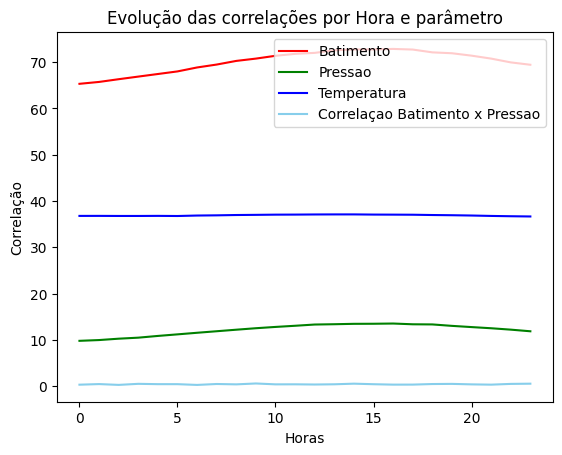

In [492]:
# Plota um gráfico de linhas com a evolução das correlações de cada parâmetro
parametros = ['Batimento', 'Pressao', 'Temperatura']
cores = ['r', 'g', 'b', 'y']
for i, parametro in enumerate(parametros):
    plt.plot(df.mean().index, df.mean()[parametro], color=cores[i], label=parametro)
plt.plot(corr_p_b,color='skyblue',label='Correlaçao Batimento x Pressao')
plt.xlabel('Horas')
plt.ylabel('Correlação')
plt.title('Evolução das correlações por Hora e parâmetro')
plt.legend()
plt.show()

Nesse grafico observa-se que a correlaçao entre Batimento e Pressao por hora resultou numa curva praticamente reta, nao demonstrando o comportamento dessas variaveis. Por isso, pode ser mais interessante utilizar uma das variaveis para representar as duas, ja que elas estao fortemente correlacionadas, do que utilizar a correlaçao delas para o aprendizado. Além disso, é importante notar que essa correlaçao nao muda com o tempo, confirmando que pode valer a pena utilizar apenas uma delas pra mediçao ao longo do tempo. 

No caso pratico, poderia-se medir apenas a pressao ou o batimento do paciente e a partir disso constatar a saude do paciente com relaçao a essas duas variaveis observando apenas uma delas, em termos de hora. 

In [495]:
tamanho_pacote = 24  # Tamanho desejado para cada pacote
pacotes = []  # Lista para armazenar os pacotes

# Selecionar apenas as colunas desejadas
dados_selecionados = data[['Batimento', 'Pressao']]

# Dividir os dados em pacotes de tamanho 'tamanho_pacote'
for i in range(0, len(dados_selecionados), tamanho_pacote):
    pacote = dados_selecionados.iloc[i:i+tamanho_pacote].reset_index(drop=True)
    pacotes.append(pacote)

In [496]:
# Calcula a matriz de correlação da variavel pelo dia(pacote)
matrizes_corr = []
for pacote in pacotes:
    matriz_corr = pacote.corr()
    matrizes_corr.append(matriz_corr)

In [497]:
matrizes_corr

[           Batimento  Pressao
 Batimento        1.0      1.0
 Pressao          1.0      1.0,
            Batimento   Pressao
 Batimento   1.000000  0.999977
 Pressao     0.999977  1.000000,
            Batimento  Pressao
 Batimento    1.00000  0.99986
 Pressao      0.99986  1.00000,
            Batimento  Pressao
 Batimento    1.00000  0.99977
 Pressao      0.99977  1.00000,
            Batimento   Pressao
 Batimento   1.000000  0.999615
 Pressao     0.999615  1.000000,
            Batimento   Pressao
 Batimento   1.000000  0.999491
 Pressao     0.999491  1.000000,
            Batimento   Pressao
 Batimento   1.000000  0.998799
 Pressao     0.998799  1.000000,
            Batimento   Pressao
 Batimento   1.000000  0.998258
 Pressao     0.998258  1.000000,
            Batimento  Pressao
 Batimento     1.0000   0.9984
 Pressao       0.9984   1.0000,
            Batimento  Pressao
 Batimento    1.00000  0.99604
 Pressao      0.99604  1.00000,
            Batimento   Pressao
 Batimento   

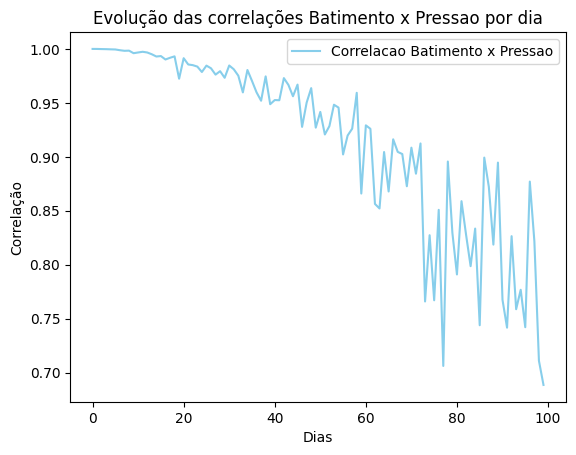

In [500]:
# Plota um gráfico de linhas com a evolução das correlações de cada parâmetro
plt.plot(range(len(pacotes)), [matriz_corr.loc['Batimento', 'Pressao'].mean() for matriz_corr in matrizes_corr], color='skyblue', label='Correlacao Batimento x Pressao')
plt.xlabel('Dias')
plt.ylabel('Correlação')
plt.title('Evolução das correlações Batimento x Pressao por dia')
plt.legend()
plt.show()

No caso da média correlaçao Batimento x Pressao por dia, observou-se um decrescimento desse valor ao longo dos dias. Na tabela de correlaçoes também é verificado que as correlaçoes dos primeiros dias sao maiores e dos ultimos dias menores. Apesar das variaveis serem fortemente correlacionadas no geral e em amostras por hora, quando analisadas por dia possuem um decrescimento na correlaçao. 

Em termos praticos, isso pode ser importante na analise do paciente, pois ao passar dos dias, pode ser preciso mensurar as 3 variaveis, uma vez que a correlaçao entre as duas mais fortes decai. 

## 4 ) Ferramental Descritivo 

Nessa etapa foram verificados os resultados para as medidas de posiçao (média, moda, mediana, histograma) e medidas de dispersao (variancia e desvio padrao). 

In [501]:
#Imports 
import statistics as stats #Medidas de posiçao e dispersao
from collections import Counter #Medidas de posicao e dispersao
import seaborn as sb #plot correlaçao 

In [533]:
data.drop(columns=['index']).describe()


,Batimento,Pressao,Temperatura
count,2400.000000,2400.000000,2400.000000
mean,70.110302,12.184503,36.891543
std,2.596138,1.260424,0.202142
min,62.677785,8.539146,36.456422
25%,68.295517,11.287009,36.749488
50%,70.618385,12.454484,36.894476
75%,72.236410,13.239359,37.010353
max,74.000000,14.000000,37.480333


Esta tabela apresenta os valores obtidos para a média de cada variavel na linha denominada mean. 

In [536]:
#Calculo mediana 
print('Mediana batimento: ',round(stats.median(data['Batimento']),2))
print('Mediana Pressao: ',round(stats.median(data['Pressao']),2))
print('Mediana Temperatura: ',round(stats.median(data['Temperatura']),2))

Mediana batimento:  70.62
Mediana Pressao:  12.45
Mediana Temperatura:  36.89


In [570]:
#Calculo moda - valida por dia 
print('Moda batimento: ',round(stats.mode(data['Batimento']),2))
print('Moda Pressao: ',round(stats.mode(data['Pressao']),2))
print('Moda Temperatura: ',round(stats.mode(data['Temperatura']),2))

Moda batimento:  70.69
Moda Pressao:  12.35
Moda Temperatura:  36.83


Sao apresentados também os valores de mediana e moda. Nas 3 variaveis tanto média, quanto mediana e moda sao valores proximos. 

A seguir é verificado o comportamento da média e da mediana ao longo dos dias para as 3 varivaeis. 

In [571]:
%%capture
tamanho_pacote = 24  # Tamanho desejado para cada pacote
pacotes = []  # Lista para armazenar os pacotes

# Selecionar apenas as colunas desejadas
dados_selecionados = data[['Batimento', 'Pressao', 'Temperatura']]

# Dividir os dados em pacotes de tamanho 'tamanho_pacote'
for i in range(0, len(dados_selecionados), tamanho_pacote):
    pacote = dados_selecionados.iloc[i:i+tamanho_pacote].reset_index(drop=True)
    pacotes.append(pacote)

pacotes
    

Text(0, 0.5, 'BATIMENTO')

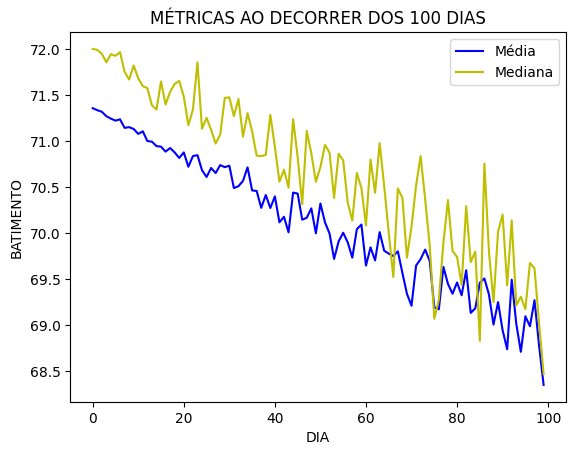

In [577]:
medias_batimento = []  # lista para armazenar as médias de batimento de cada pacote
median_batimento = []
for pacote in pacotes:
    media_pacote = pacote['Batimento'].mean()  # calcula a média da coluna 'batimento' do pacote atual
    medias_batimento.append(media_pacote)
    median_pacote = pacote['Batimento'].median()  # calcula a média da coluna 'temperatura' do pacote atual
    median_batimento.append(median_pacote) 
indices_pacotes = range(len(pacotes))# Cria um eixo x com os índices dos pacotes
plt.plot(indices_pacotes, medias_batimento,color='b',label='Média')# Plote o gráfico de linha
plt.plot(indices_pacotes, median_batimento,color='y',label='Mediana')
plt.title("MÉTRICAS AO DECORRER DOS 100 DIAS")
plt.legend()
plt.xlabel("DIA")
plt.ylabel("BATIMENTO")

Text(0, 0.5, 'PRESSAO')

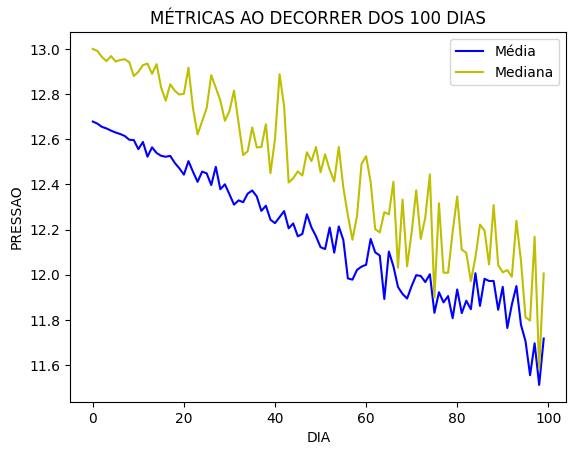

In [578]:
medias_pressao = []  # lista para armazenar as médias de batimento de cada pacote
median_pressao = []
for pacote in pacotes:
    media_pacote = pacote['Pressao'].mean()  # calcula a média da coluna 'batimento' do pacote atual
    medias_pressao.append(media_pacote)
    median_pacote = pacote['Pressao'].median()  # calcula a média da coluna 'pressao' do pacote atual
    median_pressao.append(median_pacote) 
indices_pacotes = range(len(pacotes))# Cria um eixo x com os índices dos pacotes
plt.plot(indices_pacotes, medias_pressao,color='b',label='Média')# Plote o gráfico de linha
plt.plot(indices_pacotes, median_pressao,color='y',label='Mediana')
plt.title("MÉTRICAS AO DECORRER DOS 100 DIAS")
plt.legend()
plt.xlabel("DIA")
plt.ylabel("PRESSAO")

Text(0, 0.5, 'TEMPERATURA')

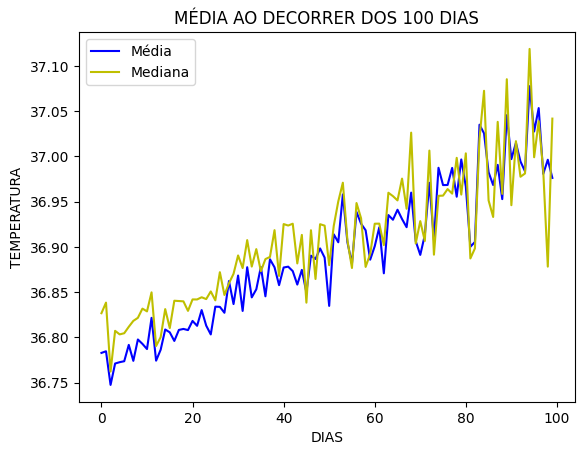

In [584]:
medias_temperatura = []  # lista para armazenar as médias de temperatura de cada pacote
median_temperatura = []
for pacote in pacotes:
    media_pacote = pacote['Temperatura'].mean()  # calcula a média da coluna 'temperatura' do pacote atual
    medias_temperatura.append(media_pacote) 
    median_pacote = pacote['Temperatura'].median()  # calcula a média da coluna 'temperatura' do pacote atual
    median_temperatura.append(median_pacote)     
    
# Cria um eixo x com os índices dos pacotes
indices_pacotes = range(len(pacotes))

# Plote o gráfico de linha
plt.plot(indices_pacotes, medias_temperatura,color='b',label='Média')
plt.plot(indices_pacotes, median_temperatura,color='y',label='Mediana')
plt.legend()
plt.title("MÉDIA AO DECORRER DOS 100 DIAS")
plt.xlabel("DIAS")
plt.ylabel("TEMPERATURA")

Nos 3 casos a média, mediana e moda apresentaram comportamentos similares. Para a Pressao e Batimento eles decairam e para temperatura cresceram ao longo dos dias. Nos 3 graficos a mediana apresentou geralmente valores superiores a média. 

A seguir os histogramas para dada variavel: 

array([[<Axes: title={'center': 'Batimento'}>,
        <Axes: title={'center': 'Pressao'}>],
       [<Axes: title={'center': 'Temperatura'}>, <Axes: >]], dtype=object)

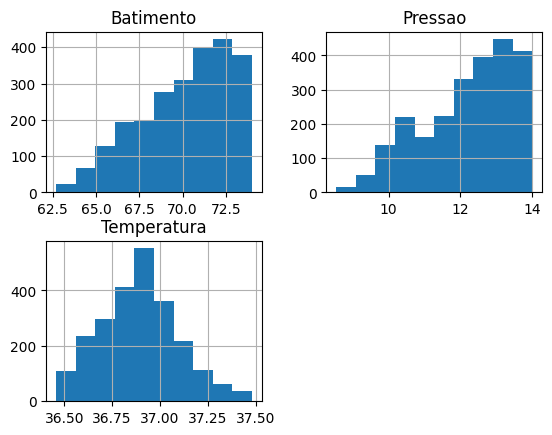

In [588]:
#Histogramas
data[['Batimento','Pressao','Temperatura']].hist()

Observa-se pelos graficos que a distribuiçao dos dados para o batimento e pressao sao parecidos e possuem uma assimetria à direita. Em contrapartida, a distribuiçao da temperatura é mais simetrica, com um pico proximo ao centro e é diferente das distribuiçoes das demais variaveis. 

Pelos passos anteriores constatou-se que a mediana é maior que a média. Isso pode ser observado sobretudo pela assimetria dos graficos de batimento e pressao à direita. 

Pelos histogramas observou-se os valores para cada uma das variaveis: 
* Batimento: Valores geralmente maiores de 60 e menores de 80. 
* Pressao: Valores geralmente maiores de 8 e menores ou iguais a 15. 
* Temperatura: Valores geralmente maiores que 36 e menores ou iguais a 37,5°C.  

Considerando os intervalos de valores comumente adotados pela medicina, tem-se: 
* Batimento : de 50 a 100 bpm. 
* Pressao: de 9,6 a 12,8. 
* Temperatura: de 36 a 37,2°C. 

Para a construçao do sistema foi considerado os valores comumente adotados pela medicina. Pelo histograma observa-se que alguns valores ja trazem resultados de estados de alerta enquanto outros sao referentes a pacientes saudaveis. 

In [590]:
#Sistema considerando valores normais adotados na medicina 
def main():
  try:
    #entradas
    b, p, t = input("Digite o batimento, a pressao e a temperatura do paciente: ").split()
    #processamento 
    b, p, t = float(b), int(p), int(t)
    if (b < 50.0) or (b > 100.0):
      print("Alarme de emergência")
    elif (p < 9.6) or (p > 12.8):
      print("Alarme de emergência")
    elif (t < 36.0 ) or (t > 37.2):
      print("Alarme de emergência")
    else: 
      print("O paciente esta saudavel!")
  except: 
    print("Numeros invalidos. Favor, repetir a operaçao!")


if __name__ == "__main__":
    main()

Digite o batimento, a pressao e a temperatura do paciente: 60 12 36
O paciente esta saudavel!


Por fim, o sistema é capaz de classificar o paciente como saudável ou emitir um alerta de caso o valor capturado para uma das variáveis não esteja de acordo com os valores normais esperados para o paciente considerando os intervalos comumente adotados pela medicina. Observa-se que esses valores estão de acordo com os histogramas obtidos também, englobando a maior parte dos valores medidos. 
Caso ocorra um erro de digitação ou sejam digitados caracteres ao invés de valores válidos para a lógica do sistema, o sistema apresenta a mensagem de números inválidos e solicita ao usuário repetir a operação. 

